In [1]:
import pandas as pd
import matplotlib.pyplot as plt

agb = pd.read_csv('aus-bond-liquidity-analysis/data/agb_yield_curve.csv')
cash_rate = pd.read_excel('aus-bond-liquidity-analysis/data/RBA_cash_rate_target.xlsx', skiprows=10)
cash_rate = cash_rate.rename(columns={
    cash_rate.columns[0]: 'Date',
    cash_rate.columns[1]: 'Cash Rate Target'
})
futures = pd.read_csv('aus-bond-liquidity-analysis/data/bond_futures_volume.csv')

print(agb.head())
print(cash_rate.head())
print(cash_rate.columns)
print(futures.head())



FileNotFoundError: [Errno 2] No such file or directory: 'aus-bond-liquidity-analysis/data/agb_yield_curve.csv'

In [ ]:
cash_rate = cash_rate[['Date','Cash Rate Target']]
cash_rate['Date'] = pd.to_datetime(cash_rate['Date'])
cash_rate = cash_rate.sort_values('Date')
cash_rate.head()


,Date,Cash Rate Target
0,2011-01-04,4.75
1,2011-01-05,4.75
2,2011-01-06,4.75
3,2011-01-07,4.75
4,2011-01-10,4.75


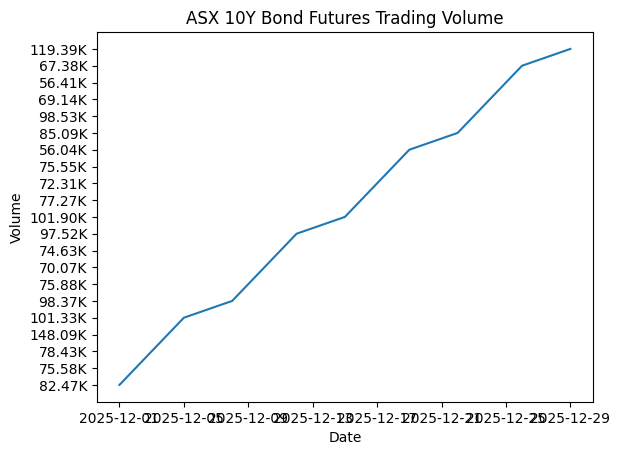

In [ ]:
futures['Date'] = pd.to_datetime(futures['Date'], dayfirst=True)
futures = futures.sort_values('Date')

plt.Figure(figsize=(10,5))
plt.plot(futures['Date'], futures['Vol.'])
plt.title('ASX 10Y Bond Futures Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [ ]:
rba_days = cash_rate[cash_rate['Cash Rate Target'].diff()!=0][['Date']]
rba_days['is_RBA_day'] = 1





In [ ]:
futures = futures.merge(rba_days, on= 'Date', how= 'left')
futures['is_RBA_day'] = futures['is_RBA_day'].fillna(0)

In [ ]:
avg_vol = futures['Vol.'].mean()
rba_avg_vol = futures[futures['is_RBA_day']==1]['Vol.'].mean()

print ('Average volume:', avg_vol)
print("RBA decision day volume:", rba_avg_vol)
print("Spike multiple:", round(rba_avg_vol/avg_vol,2))

plt.figure(figsize=(10,5))
plt.plot(futures['Date'], futures['Vol.'])
plt.scatter(futures[futures['is_RBA_day']==1]['Date'],
            futures[futures['is_RBA_day']==1]['Vol.'],
            color='red')
plt.title('ASX 10Y Bond Futures Volume – RBA Decision Impact')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()
